# Heart and related diseases study from Machine Learning Classification

## Import the librararies

In [1120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import matplotlib
from IPython.display import SVG

from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC



import random 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Activation, Dense

 
from keras.utils.vis_utils import plot_model
 
#from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K


from tensorflow.keras import Model
from keras import models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model


from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE



from pathlib import Path
import glob
import logging

from IPython.display import Image


In [1121]:
KFold

sklearn.model_selection._split.KFold

In [1122]:
############## Size For all the graphs
plt.rcParams['figure.figsize'] = (14,6)
#############

# READ IN THE DATA

In [1123]:
for name in glob.glob('data/*.*'):
    print(name)


data/Jaccard_sets_A_and_B.svg.png
data/heart.csv.xls
data/diabetes.csv
data/o2Saturation.csv.xls
data/cardio_train.csv


In [1124]:
heart = pd.read_csv('data/heart.csv.xls', index_col=0)
df = heart.copy()

In [1125]:
o2Sat= pd.read_csv('./data/o2Saturation.csv.xls')

In [1126]:
o2Sat

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [1127]:
df = df.reset_index()

In [1128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


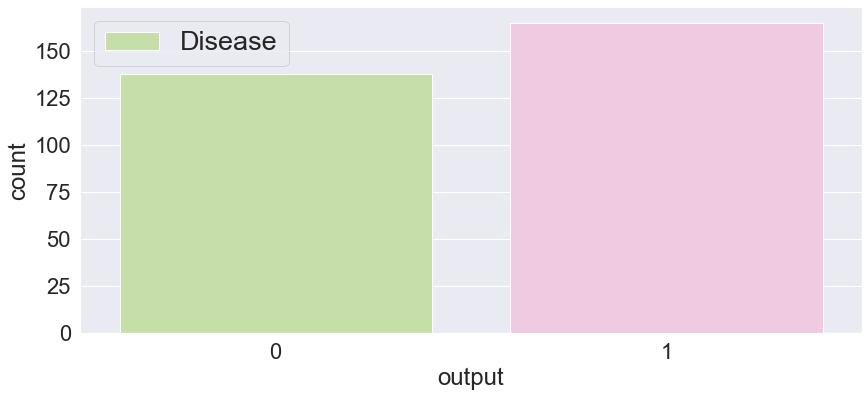

In [1129]:
sns.countplot(x ='output', data = df, palette ="PiYG_r" )
plt.legend(['Disease','No Disease'], fontsize=27)

In [1130]:
heart.head(3)

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [1131]:
heart.shape

(303, 13)

 ## Filtering data by POSITIVE and NEGATIVE Heart Disease patient separatively
 

In [1132]:
postive_data = df[df['output']==1]
postive_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [1133]:
negative_data = df[df['output']==0]
negative_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [1134]:
df.shape, o2Sat.shape

((303, 14), (3585, 1))

In [1135]:
df.describe(include = "all")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(14.5, -0.5)

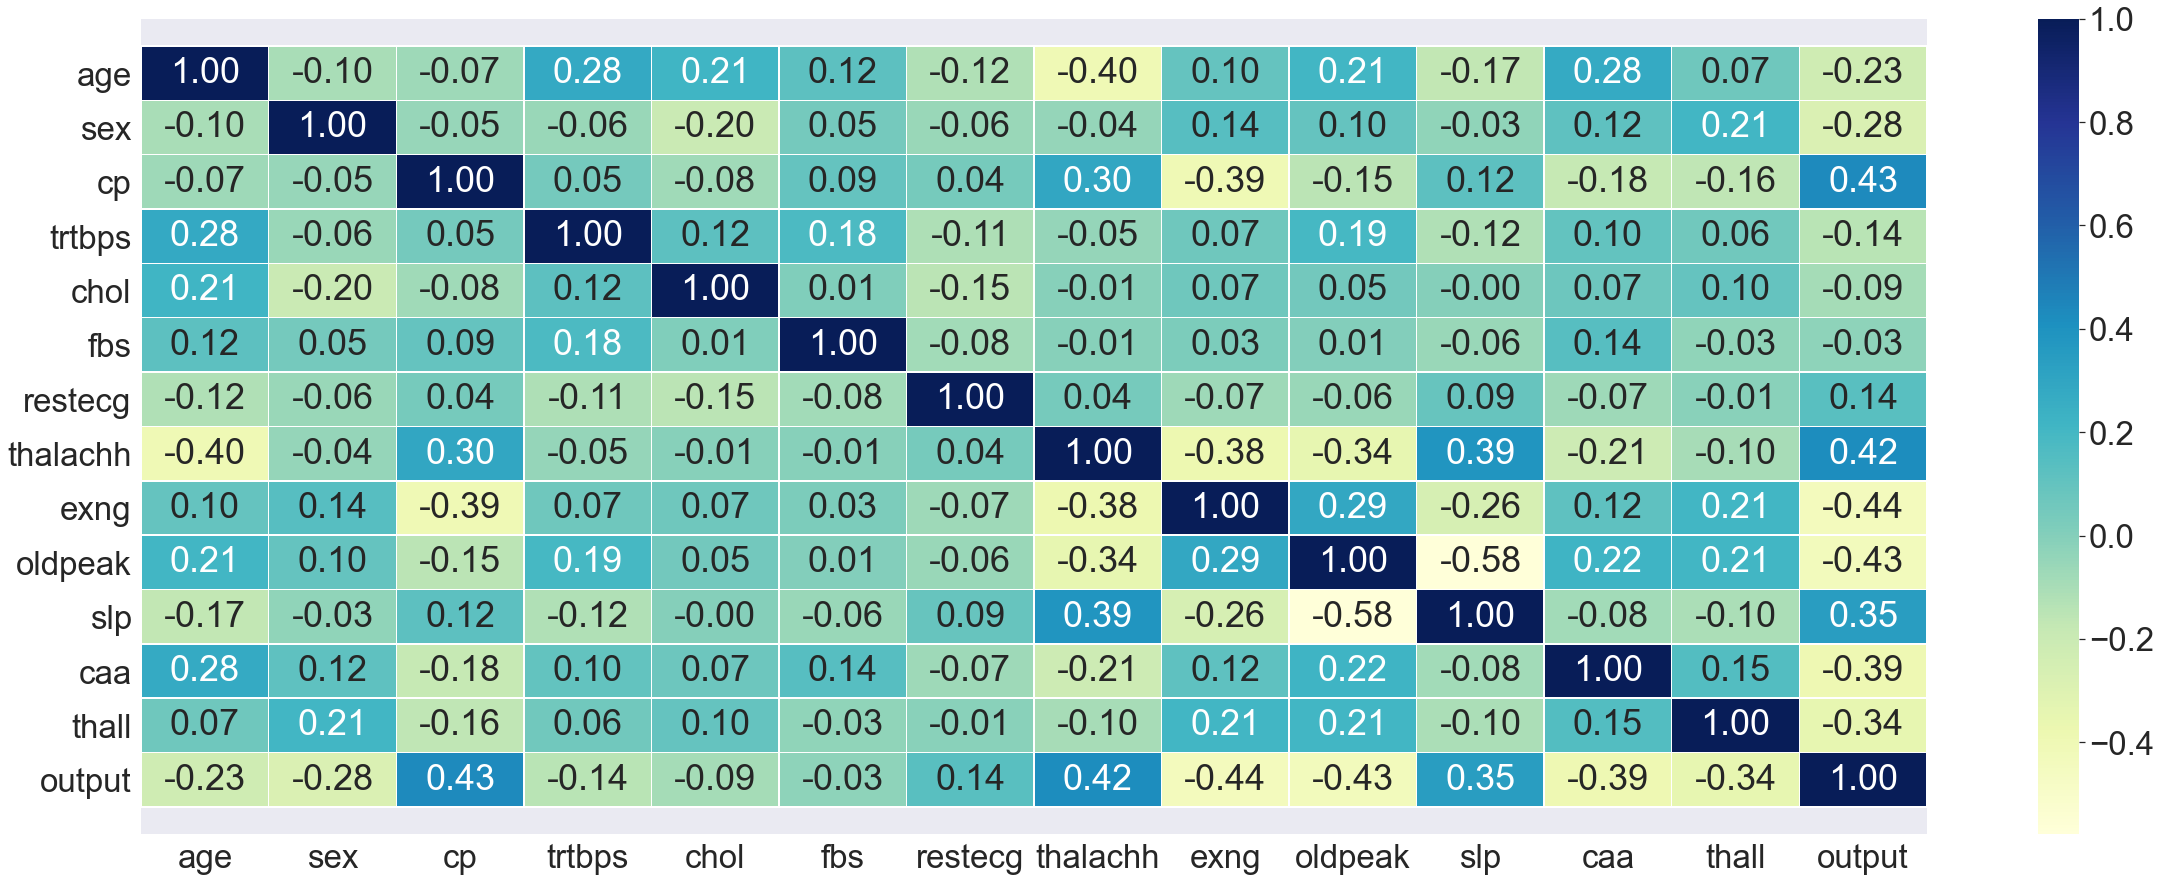

In [1136]:
sns.set(font_scale = 3)
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize =(40,15 ) )
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top-0.5)
 

<AxesSubplot:title={'center':'Correlation with output'}>

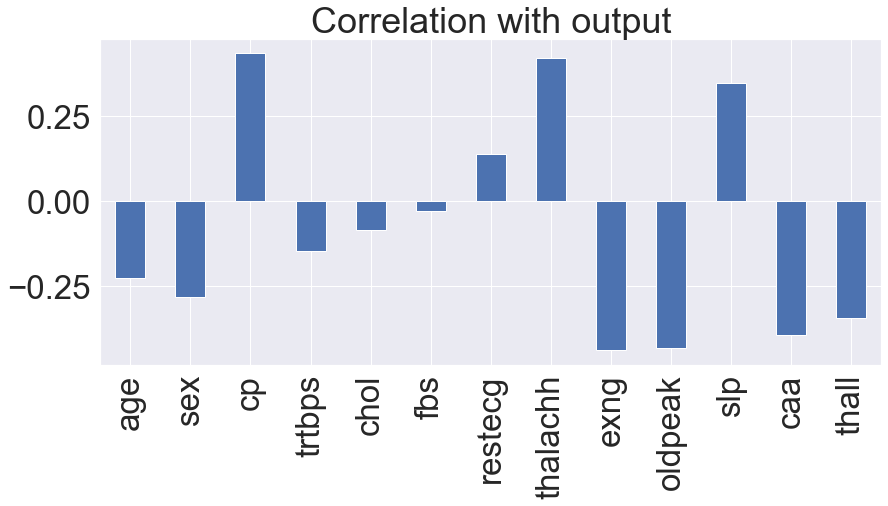

In [1137]:


df.drop('output', axis=1).corrwith(df.output).plot(kind='bar' , grid=True, title="Correlation with output")

<AxesSubplot:title={'center':'Correlation with trtbps'}>

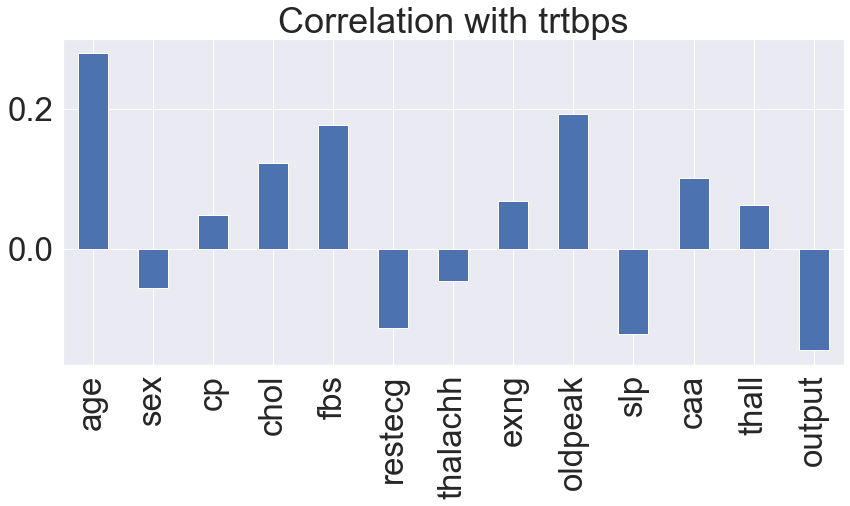

In [1138]:
df.drop('trtbps', axis=1).corrwith(df.trtbps).plot(kind='bar' , grid=True, title="Correlation with trtbps")

Text(0.5, 1.0, 'Oxygen saturation level')

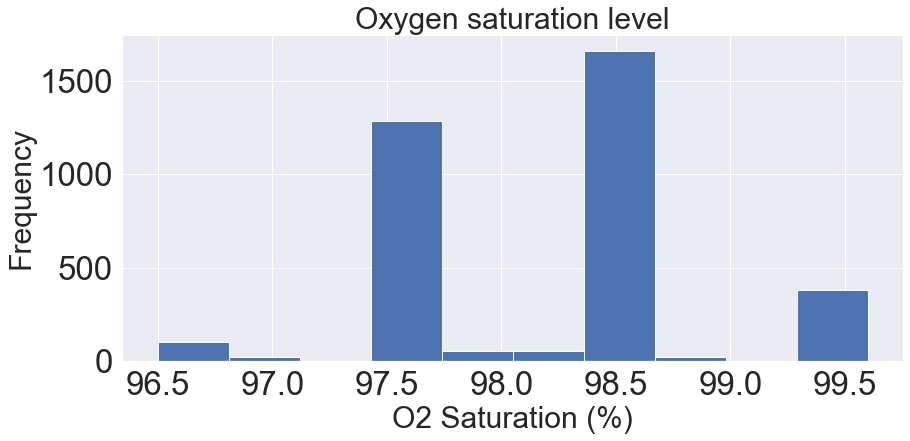

In [1139]:
o2Sat.hist() 
plt.ylabel('Frequency', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('O2 Saturation (%)', fontsize=30)
plt.title('Oxygen saturation level', fontsize=30)

In [1140]:
#df = df.reset_index()

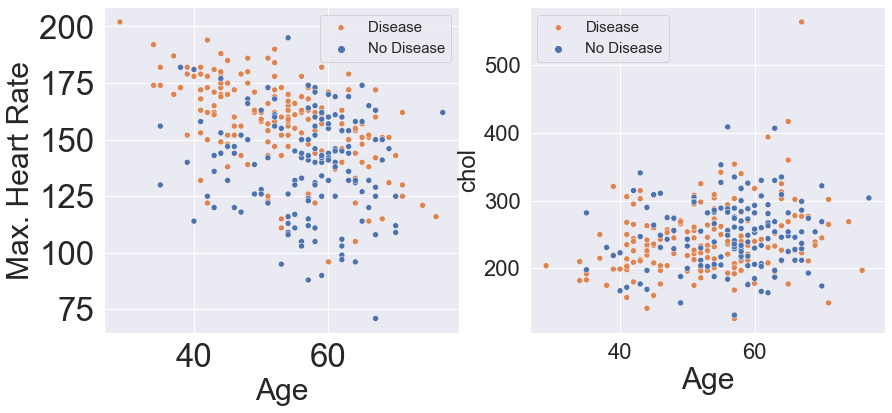

In [1141]:
plt.subplot(1,2,1)
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='age',  y='thalachh', hue='output')
plt.xlabel('Age', fontsize=30)
plt.ylabel('Max. Heart Rate', fontsize=30)
plt.legend(['Disease ','No Disease'], fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='age',  y='chol', hue='output')
plt.xlabel('Age', fontsize=30)
ax.yaxis.set_label_position("right")
#plt.ylabel('Cholesterol', fontsize=30,  loc= None )
plt.legend(['Disease','No Disease'], fontsize=15)

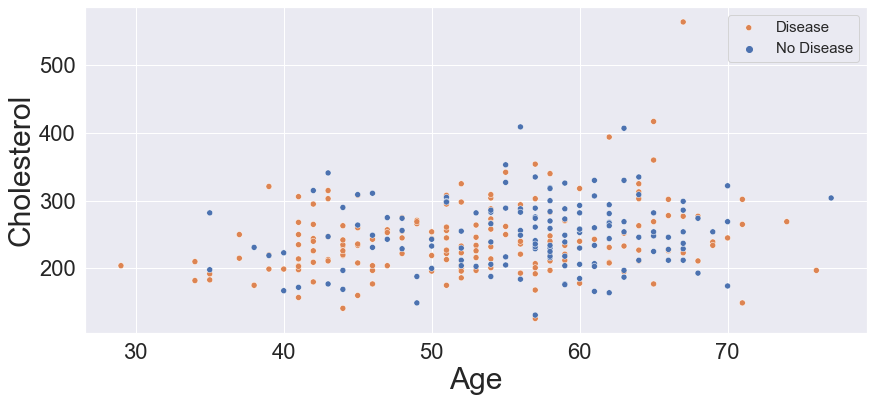

In [1142]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='age',  y='chol', hue='output')
plt.xlabel('Age', fontsize=30)
plt.ylabel('Cholesterol', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

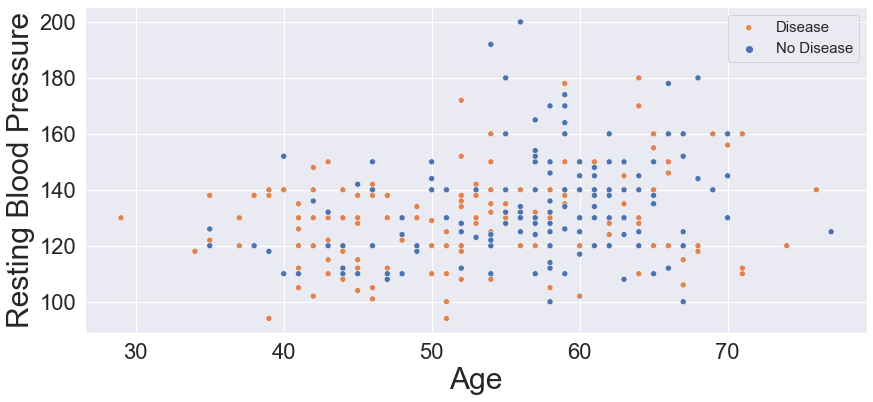

In [1143]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='age',  y='trtbps', hue='output')
plt.xlabel('Age', fontsize=30)
plt.ylabel('Resting Blood Pressure', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

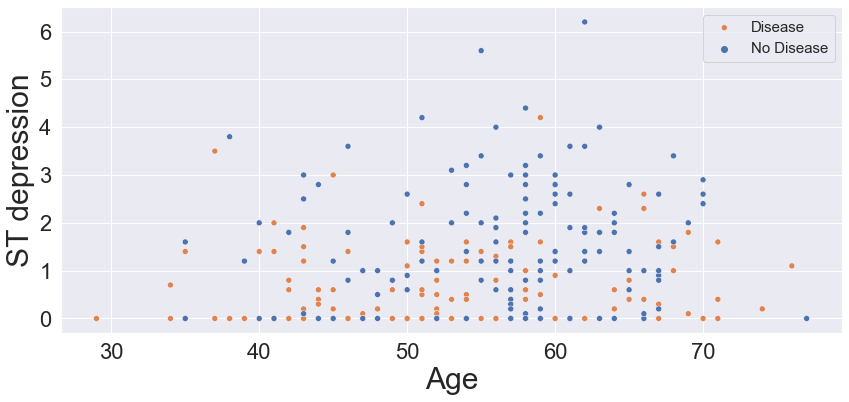

In [1144]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='age',  y='oldpeak', hue='output')
plt.xlabel('Age', fontsize=30)
plt.ylabel('ST depression', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

Text(0.5, 0, 'Age')

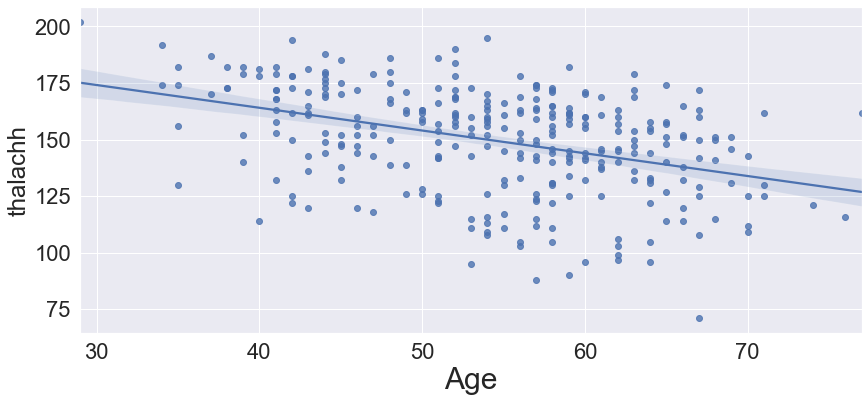

In [1145]:
sns.set(font_scale = 2)
#sns.scatterplot(data=df, x='age',  y='thalachh', hue='output')
sns.regplot(data=df, x='age',  y='thalachh')
plt.xlabel('Age', fontsize=30)
 

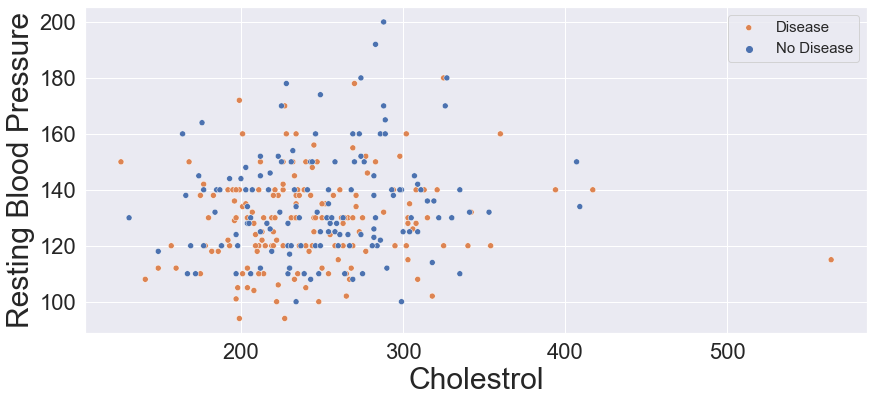

In [1146]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='chol',  y='trtbps', hue='output')
plt.xlabel('Cholestrol', fontsize=30)
plt.ylabel('Resting Blood Pressure', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

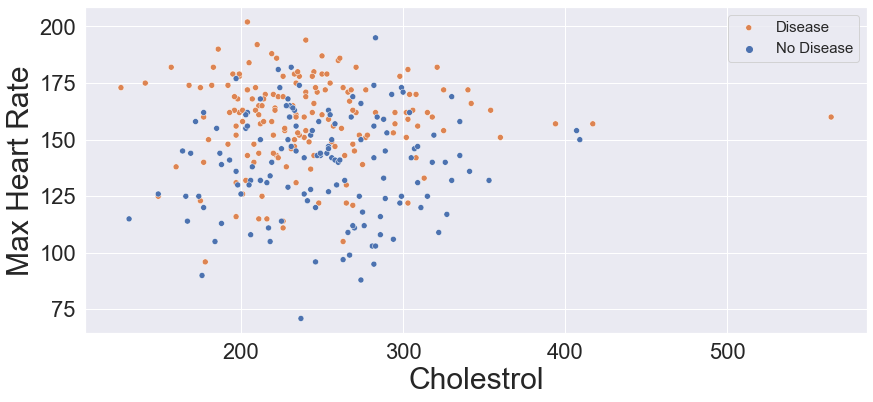

In [1147]:
sns.set(font_scale = 2)
sns.scatterplot(data=df, x='chol',  y='thalachh', hue='output')
plt.xlabel('Cholestrol', fontsize=30)
plt.ylabel('Max Heart Rate', fontsize=30)
plt.legend(['Disease','No Disease'], fontsize=15)

In [1148]:
s=df.groupby(['thall', 'sex'])['output'].count()
s.unstack()

sex,0,1
thall,,
0,1,1
1,1,17
2,79,87
3,15,102


Text(0.5, 1.0, 'Sex vs frequency for different blood disorder --thall')

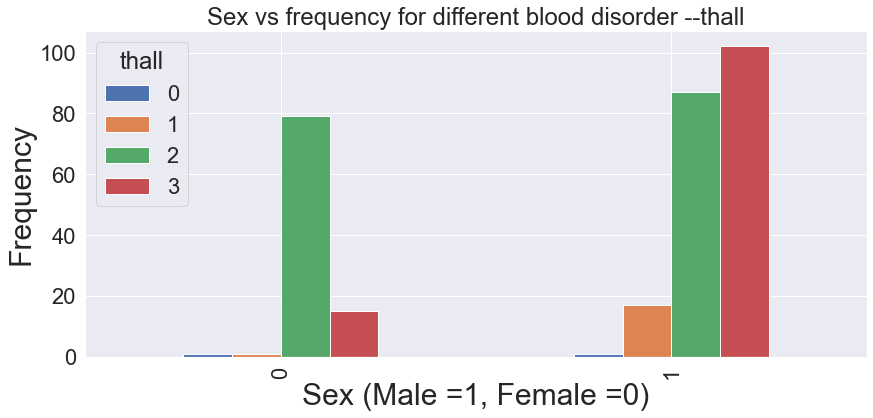

In [1149]:
s.unstack().T.plot.bar()

plt.xlabel('Sex (Male =1, Female =0)', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.title('Sex vs frequency for different blood disorder --thall')


In [1150]:
df.head(13)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [1151]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

###  For plotting 

In [1152]:
def print_evaluations(ytrue, ypred, model):
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #crep= classification_report(y_test, y_pred)
    #print(crep)
    #print(classification_report(y_test, y_pred)) # output accuracy
    #print confusion matrix
    fig = plt.figure(figsize=(10, 10))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)

    #plot the heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['no disease', 'disease']);
    ax.yaxis.set_ticklabels(['no disease', 'disease'])
    return


In [1153]:
X = df.iloc[:,:-1] #all rows (:), and all columns EXCEPT for the last one
y = df['output']

# Logistic regression

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

How does model Logistic Regression score:
The accuracy of the model is: 0.869
The precision of the model is: 0.912
The recall of the model is: 0.861
The f1-score of the model is: 0.886
[[22  3]
 [ 5 31]]


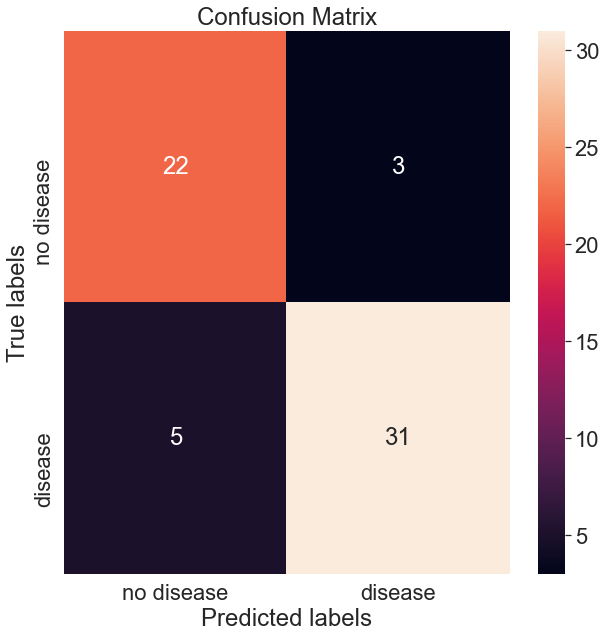

In [1154]:
def LogRegfunc(X, y):
        # normalization of the datset
        X = preprocessing.StandardScaler().fit(X).transform(X)

        # Train-and-Test -Split
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
        #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

        mlg = LogisticRegression()
        mlg.fit(X_train, y_train)
        scorelg = mlg.score(X_test, y_test)
        y_pred = mlg.predict(X_test)
        clg = mlg.coef_, mlg.intercept_
        glabel=  mlg.predict(X_train)
        prglabel = mlg.predict_proba(X_train)
        return X_test, y_test, y_pred, clg, glabel , prglabel, scorelg,mlg
X_test, y_test, y_pred, clg, glabel , prglabel, scorelg , mlg= LogRegfunc(X, y)
print(classification_report(y_test, y_pred)) # output accuracy
print_evaluations(y_test, y_pred, 'Logistic Regression')


logReg_cm =    confusion_matrix(y_test, y_pred)
logReg_score =    round(mlg.score(X_test,y_test)*100)


## score and cross validation 

In [1155]:
(cross_val_score(mlg, X, y, cv=5)).mean() , (cross_val_score(mlg, X, y, cv=5)).std() 

(0.8215846994535518, 0.0392682933840911)

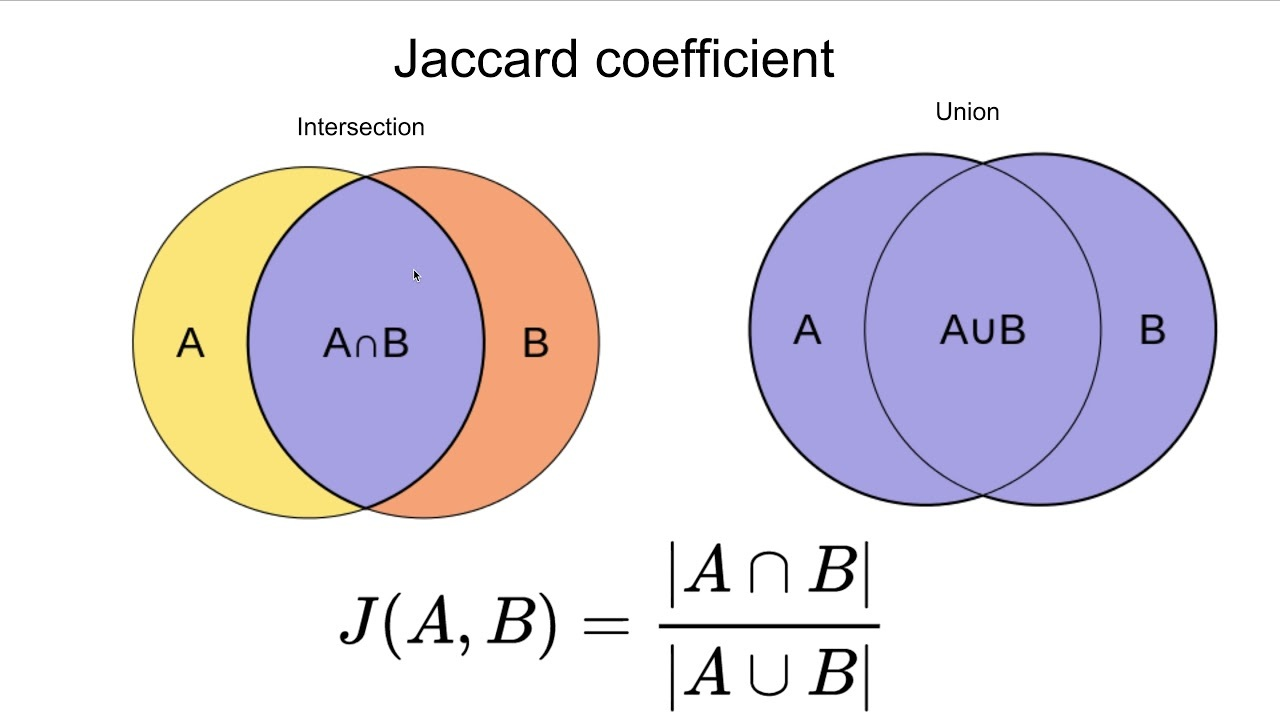

In [1156]:
Image(filename='data/Jaccard_sets_A_and_B.svg.png',width=400)

In [1157]:
print('Accuracy of the model in jaccard similarity score is = ', jaccard_score(y_test, y_pred))

Accuracy of the model in jaccard similarity score is =  0.7948717948717948


### Logistic regression coefficients 

In [1158]:
print('Coeficients', clg)

Coeficients (array([[-0.06788289, -0.73256124,  0.78672448, -0.35865295, -0.14067963,
         0.0710876 ,  0.25167157,  0.37872118, -0.36696666, -0.68547235,
         0.38579396, -0.72311499, -0.45467899]]), array([0.06046868]))


# Train the model decison tree

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       103
           1       0.92      0.99      0.96       124

    accuracy                           0.95       227
   macro avg       0.96      0.95      0.95       227
weighted avg       0.95      0.95      0.95       227

How does model Decision tree classifier  score:
The accuracy of the model is: 0.952
The precision of the model is: 0.925
The recall of the model is: 0.992
The f1-score of the model is: 0.957
[[ 93  10]
 [  1 123]]


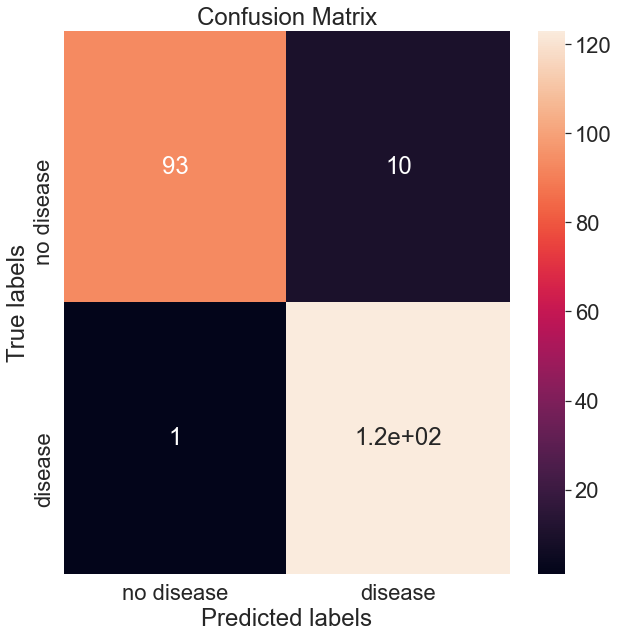

In [1341]:
####Decision tree classifier######

def  DecisionTreeCfun(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        mtr = DecisionTreeClassifier(max_depth=5)   #Hyperparameters -> there are many more you can try out against overfitting
        mtr.fit(X_train, y_train)
        y_pred = mtr.predict(X_train)   # prediction
        mtr.score(X_train, y_train)
        return X_test, y_test, y_pred, y_train, mtr
    
X_test, y_test, y_pred, y_train, mtr = DecisionTreeCfun(X,y)
print(classification_report(y_train, y_pred)) # output accuracy


print_evaluations(y_train, y_pred, 'Decision tree classifier ')

decisson_Tree_cm =    confusion_matrix(y_train, y_pred)
decisson_Tree_score =  round(mtr.score(X_test,y_test)*100)

## cross validation

In [1160]:
(cross_val_score(mtr, X, y, cv=5)).mean() , (cross_val_score(mtr, X, y, cv=5)).std() 

(0.7754098360655737, 0.055480387500763846)

In [1161]:
#print(classification_report(y_test, y_pred)) # output accuracy

In [1162]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

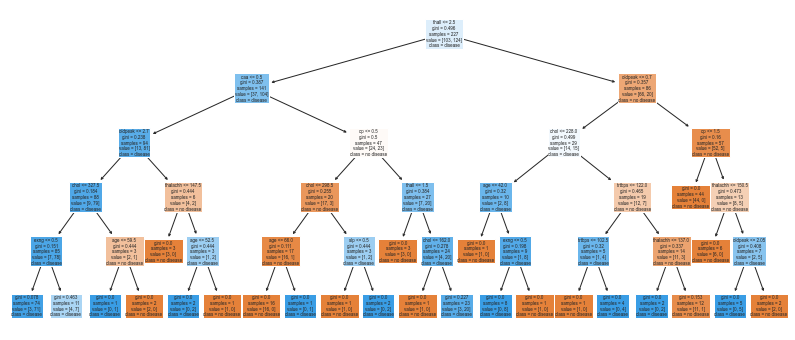

In [1163]:
plot_tree(mtr, feature_names=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'], class_names=['no disease','disease'], filled =True  )  ;

# Challenge: Beat Kristians Baseline Model  

In [1164]:
df['output'].value_counts() 

1    165
0    138
Name: output, dtype: int64

### super primitive output "all have diseases"

In [1165]:
prediction=[0]*303    ###super primitive output "all have diseases"

In [1166]:
correct = 165
total = 165+138

accuracy = correct/total
accuracy, total

(0.5445544554455446, 303)

### second base line model: super primitive 'coin toss model'

In [1167]:
prediction =[random.choice([0,1]) for i in range (303)]

In [1168]:
accuracy_score(df['output'], prediction)

0.4884488448844885

## Building the baseline model

In [1169]:
def baseline(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        ypred_baseline = [1] * len(y_train.values)
        return ypred_baseline,y_train

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       103
           1       0.55      1.00      0.71       124

    accuracy                           0.55       227
   macro avg       0.27      0.50      0.35       227
weighted avg       0.30      0.55      0.39       227

How does model Baseline Model score:
The accuracy of the model is: 0.546
The precision of the model is: 0.546
The recall of the model is: 1.0
The f1-score of the model is: 0.707
[[  0 103]
 [  0 124]]


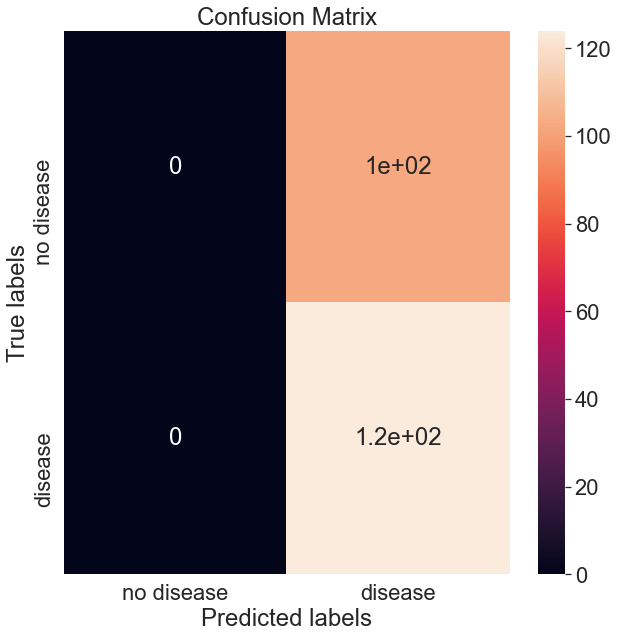

In [1170]:
ypred_baseline,y_train = baseline(X,y)
#generating predictions of all ones, i.e. the model guesses  DISEASES  for all cases.
print(classification_report(y_train, ypred_baseline)) # output accuracy
print_evaluations(y_train, ypred_baseline, 'Baseline Model')

## Compare it to a random forest classifier

In [1171]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

How does model RandomForest score:
The accuracy of the model is: 0.855
The precision of the model is: 0.857
The recall of the model is: 0.878
The f1-score of the model is: 0.867
[[29  6]
 [ 5 36]]


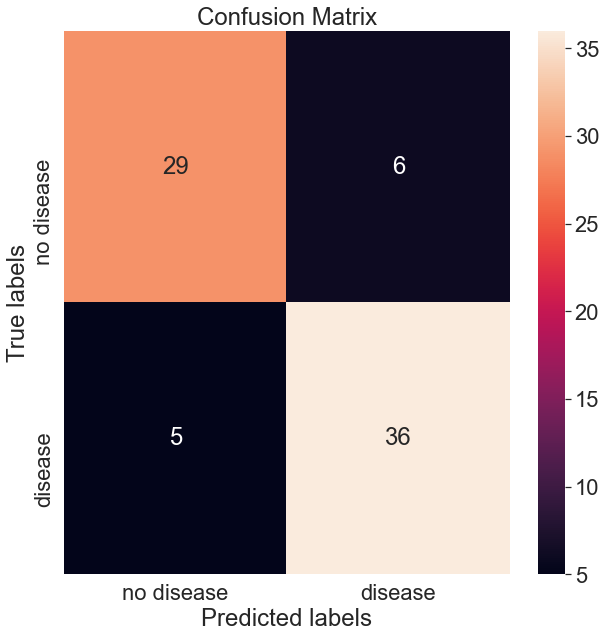

In [1172]:
def RandomForestfunc(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)
        rf.fit(X_train, y_train)
        ypred_rf = rf.predict(X_test)
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)
        return ypred_rf,X_test, y_test, cv_all, training_score
ypred_rf, X_test, y_test, cv_all , training_score = RandomForestfunc(X,y)
print(classification_report(y_test, ypred_rf)) # output accuracy
print_evaluations(y_test, ypred_rf, 'RandomForest')

random_forest_cm =    confusion_matrix(y_test, ypred_rf)
random_forest_score =   round(mtr.score(X_test,y_test)*100)

 

In [1173]:
(cross_val_score(rf, X, y, cv=5)).mean() , (cross_val_score(rf, X, y, cv=5)).std() 

(0.8349180327868853, 0.02981444000999143)

In [1174]:
####cv_all, cv_all.mean(), training_score

# Methods to improve: Use Undersampling

In [1175]:
(y_train == 0).sum(), (y_train == 1).sum()

(103, 124)

How does model Random Undersampling score:
The accuracy of the model is: 0.868
The precision of the model is: 0.878
The recall of the model is: 0.878
The f1-score of the model is: 0.878
[[30  5]
 [ 5 36]]


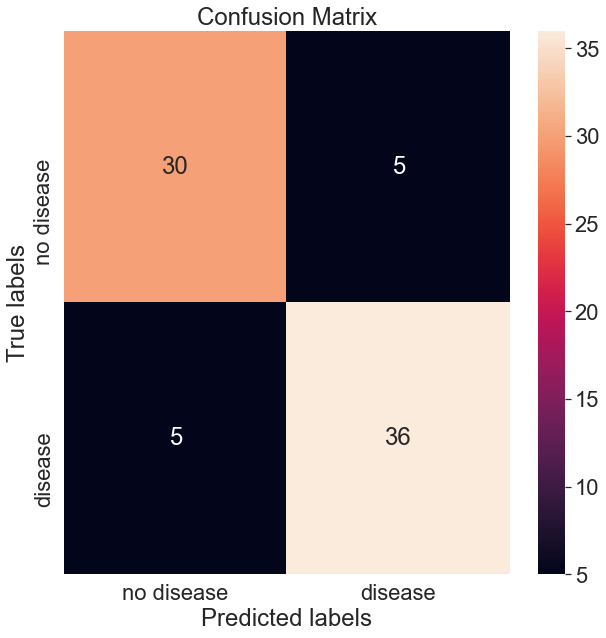

In [1176]:
def  RanSamplerfunc(X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        #print((y_train == 0).sum(), (y_train == 1).sum())
        rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)


        rus = RandomUnderSampler(sampling_strategy={0:95},random_state=10)
        #This is  modified depending on the number of samples
        # we are asking for 95 data points out of 103 in the first class. ## (y_train == 0).sum(), (y_train == 1).sum()

        nm = NearMiss(sampling_strategy={0: 95}) ####  This is modified depending on the number of samples.
                                                ####(y_train == 0).sum(), (y_train == 1).sum()


        X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
        #fit_resample() new imblearn syntax
        #very conceptually similar to .fit_transform() <---sklearn

        X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)


        ### Exact same code as before, but this time we are training the Random Forest on the undersampled  / down-sampled
        rf.fit(X_train_rus, y_train_rus)
        ypred_rus = rf.predict(X_test)

        
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)

        return ypred_rus, y_test, X_train_nm, y_train_nm, X_test, X_train, cv_all, training_score
ypred_rus, y_test, X_train_nm, y_train_nm, X_test , X_train, cv_all, training_score =RanSamplerfunc(X,y)
print_evaluations(y_test, ypred_rus, 'Random Undersampling')


In [1177]:
#cv_all, cv_all.mean(), training_score

#  Near Miss

How does model Near Miss score:
The accuracy of the model is: 0.842
The precision of the model is: 0.854
The recall of the model is: 0.854
The f1-score of the model is: 0.854
[[29  6]
 [ 6 35]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



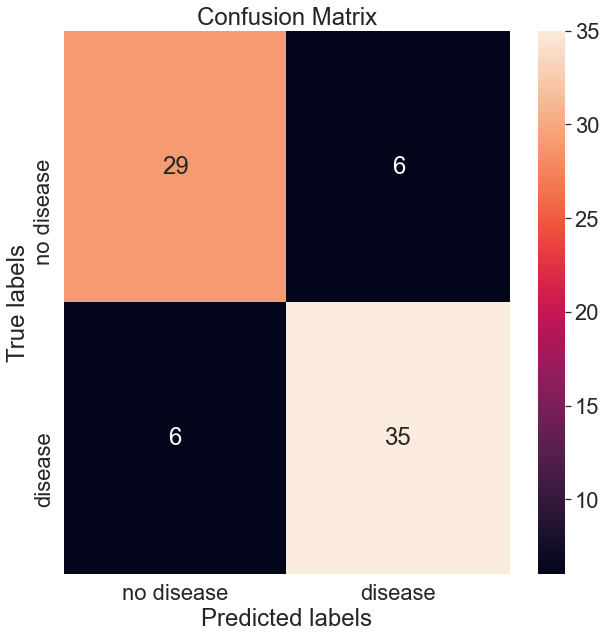

In [1178]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)
rf.fit(X_train_nm, y_train_nm)
ypred_nm = rf.predict(X_test)        

cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
training_score = rf.score(X_train,y_train)



print_evaluations(y_test, ypred_nm, 'Near Miss')
print(classification_report(y_test, ypred_nm)) # output accuracy

In [1179]:
#cv_all, cv_all.mean(), training_score

#  Over samplimng  SMOTE 

103 124
              precision    recall  f1-score   support

           0       0.93      0.37      0.53        35
           1       0.65      0.98      0.78        41

    accuracy                           0.70        76
   macro avg       0.79      0.67      0.65        76
weighted avg       0.78      0.70      0.66        76

How does model Random Oversampling score:
The accuracy of the model is: 0.697
The precision of the model is: 0.645
The recall of the model is: 0.976
The f1-score of the model is: 0.777
[[13 22]
 [ 1 40]]


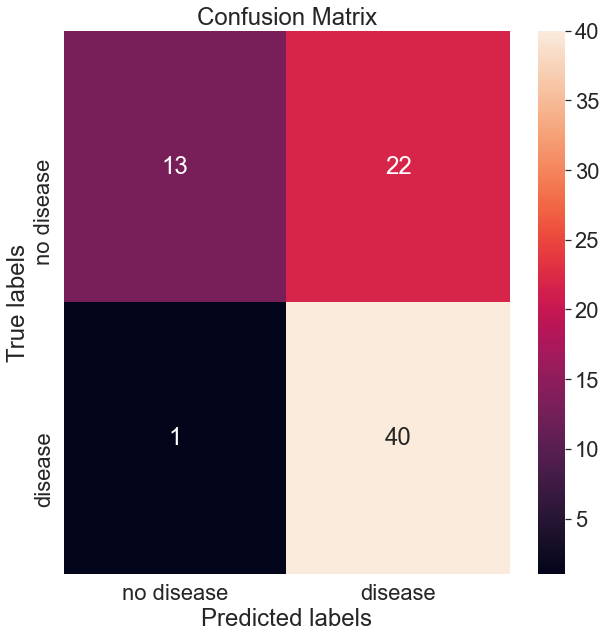

In [1180]:

def  OverSamplerfunc(X,y,rf):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
        print((y_train == 0).sum(), (y_train == 1).sum())
        ros= RandomOverSampler(random_state=10,sampling_strategy={1:520})
        #up-sampling--- the minority class to have 520  instead

        X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
        # Exact same code as before, but this time we are training
        #cthe Random Forest on the undersampled  / down-sampled data using Near Miss

        rf.fit(X_train_ros, y_train_ros)
        ypred_ros = rf.predict(X_test)
        
        
        cv_all = cross_val_score(rf,X_train, y_train, cv=5, scoring='accuracy') #cv=k=no. of folds =Her Hreuz
        training_score = rf.score(X_train,y_train)
        
        
        return ypred_ros, y_test,  cv_all, training_score 
ypred_ros, y_test,  cv_all, training_score = OverSamplerfunc(X,y,rf)

print(classification_report(y_test, ypred_ros)) # output accuracy


print_evaluations(y_test, ypred_ros, 'Random Oversampling')



In [1181]:
cv_all, cv_all.mean(), training_score

(array([0.82608696, 0.80434783, 0.8       , 0.64444444, 0.93333333]),
 0.8016425120772948,
 0.7577092511013216)

In [1182]:
df.shape

(303, 14)

# Naives Bayes Classifier

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61

How does model NBC score:
The accuracy of the model is: 0.852
The precision of the model is: 0.838
The recall of the model is: 0.912
The f1-score of the model is: 0.873
[[21  6]
 [ 3 31]]


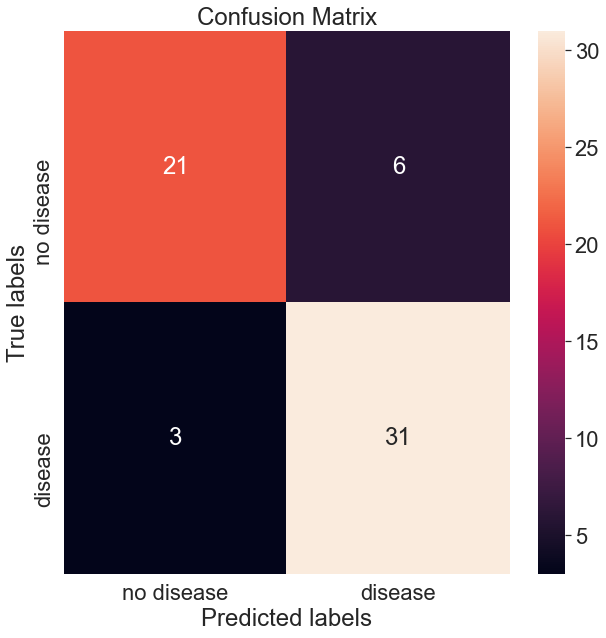

In [1183]:
def  Naives_Bayes_classifier(X,y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model_nbc = GaussianNB() # get instance of model
    model_nbc.fit(X_train, y_train) # Train/Fit model 
    y_pred_nbc = model_nbc.predict(X_test) # get y predictions
    X_test_nbc = X_test
    y_test_nbc =y_test
    
    return X_test_nbc, y_test_nbc, y_pred_nbc, model_nbc

X_test_nbc, y_test_nbc, y_pred_nbc, model_nbc = Naives_Bayes_classifier(X,y)
print(classification_report(y_test_nbc, y_pred_nbc)) # output accuracy
print_evaluations(y_test_nbc, y_pred_nbc, 'NBC')

Naives_Bayes_cm =    confusion_matrix(y_test_nbc, y_pred_nbc)
Naives_Bayes_score =  round(model_nbc.score(X_test_nbc,y_test_nbc)*100)

## cross validation

In [1184]:
(cross_val_score(model_nbc, X, y, cv=5)).mean() , (cross_val_score(model_nbc, X, y, cv=5)).std() 

(0.8050819672131148, 0.05545454701210026)

# SVM (Support Vector Machine)


              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

How does model SVC score:
The accuracy of the model is: 0.869
The precision of the model is: 0.842
The recall of the model is: 0.941
The f1-score of the model is: 0.889
[[21  6]
 [ 2 32]]


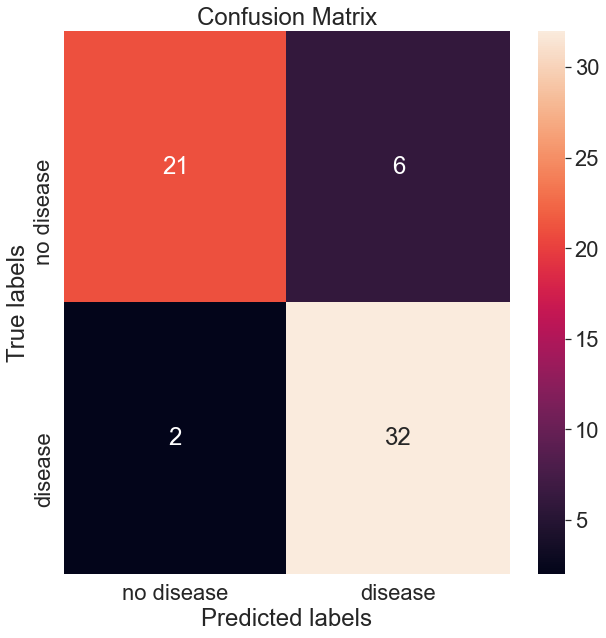

In [1185]:
def SupportVectorMachine(X,y):
    #splity X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model_svm = SVC(random_state=1) # get instance of model
    model_svm.fit(X_train, y_train) # Train/Fit model 
    
    y_pred_svm = model_svm.predict(X_test) # get y predictions
    X_test_svm =X_test
    y_test_svm =  y_test
    return X_test_svm, y_test_svm,  y_pred_svm, model_svm

X_test_svm, y_test_svm,  y_pred_svm, model_svm= SupportVectorMachine(X,y)

print(classification_report(y_test_svm, y_pred_svm)) # output accuracy
print_evaluations(y_test_svm, y_pred_svm, 'SVC') 

SupportVectorMachine_cm =    confusion_matrix(y_test_nbc, y_pred_nbc)
SupportVectorMachine_score =  round(model_svm.score(X_test_svm, y_test_svm)*100)

In [1186]:
(cross_val_score(model_svm, X, y, cv=5)).mean() , (cross_val_score(model_svm, X, y, cv=5)).std() 

(0.6434972677595628, 0.05798414187936817)

#  K-NN (K-Nearest Neighbors)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

How does model K-NN score:
The accuracy of the model is: 0.82
The precision of the model is: 0.829
The recall of the model is: 0.853
The f1-score of the model is: 0.841
[[21  6]
 [ 5 29]]


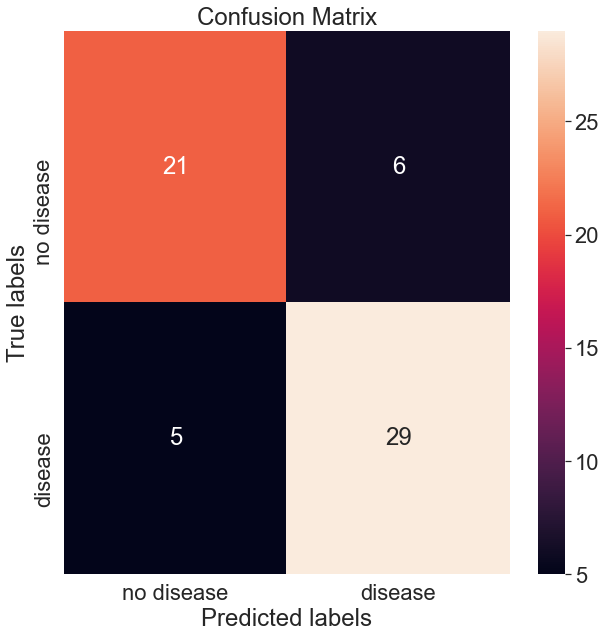

In [1187]:
def  K_NEAREST_NEIGHBORS_classifier(X,y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model_knn = KNeighborsClassifier() # get instance of model
    model_knn.fit(X_train, y_train) # Train/Fit model 
    y_pred_knn = model_knn.predict(X_test) # get y predictions
    X_test_knn = X_test
    y_test_knn =  y_test
    return X_test_knn,  y_test_knn, y_pred_knn, model_knn
X_test_knn, y_test_knn, y_pred_knn , model_knn  =   K_NEAREST_NEIGHBORS_classifier(X,y)
print(classification_report(y_test_knn, y_pred_knn)) # output accuracy  
print_evaluations(y_test_knn, y_pred_knn, 'K-NN')


K_NEAREST_NEIGHBORS_cm =    confusion_matrix(y_test_knn, y_pred_knn)
K_NEAREST_NEIGHBORS_score =  round(model_knn.score(X_test_knn, y_test_knn)*100)

In [1188]:
(cross_val_score(model_knn, X, y, cv=5)).mean() , (cross_val_score(model_knn, X, y, cv=5)).std() 

(0.643879781420765, 0.053829879683394935)

In [1189]:
df.shape

(303, 14)

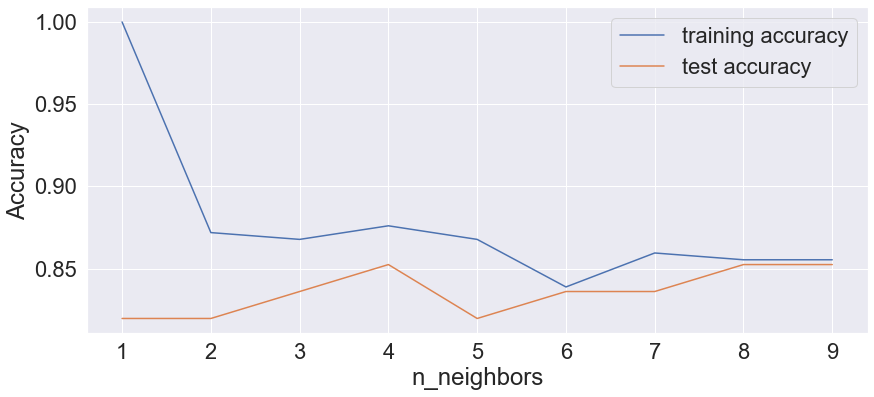

In [1190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

# Artificial Nueral Network (ANN) 

In [1192]:
###import tensorflow.python.ops.numpy_ops.np_config 
 

In [1340]:
def     ANN_func(X,y):
        K.clear_session()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)


        # keras model



        model = Sequential()
        model.add(Dense(activation = "elu", input_dim = 13, units = 8, kernel_initializer = "uniform"))
        model.add(Dense(activation = "elu", units = 12, kernel_initializer = "uniform"))
        model.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))



        model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'] )




        hist=   model.fit(X_train , y_train , batch_size = 10, epochs =180, validation_split=0.2)

        clsumm = model.summary()
        cleval = model.evaluate(X_train,y_train)
        clpred = model.predict(X_train)
        clgwt  = model.get_weights()

        model.save("model.h5")
        print("Saved model to disk")
        network = models.load_model('model.h5')

        X_test_ann = X_test
        y_test_ann = y_test
        y_pred = model.predict(X_test)
        y_pred = (y_pred > 0.5)
        return X_test_ann, y_test_ann, y_pred, hist , cleval, clpred , clgwt,network , model


In [1194]:
X_test_ann, y_test_ann, y_pred, hist , cleval, clpred , clgwt,network, model = ANN_func(X,y)

Epoch 1/180
20/20 [==============================] - 1s 13ms/step - loss: 0.6927 - accuracy: 0.5553 - val_loss: 0.6910 - val_accuracy: 0.4898
Epoch 2/180
20/20 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.6582 - val_loss: 0.6806 - val_accuracy: 0.7347
Epoch 3/180
20/20 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.7742 - val_loss: 0.6465 - val_accuracy: 0.8367
Epoch 4/180
20/20 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.7750 - val_loss: 0.5779 - val_accuracy: 0.8776
Epoch 5/180
20/20 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7782 - val_loss: 0.4944 - val_accuracy: 0.8776
Epoch 6/180
20/20 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.8054 - val_loss: 0.4264 - val_accuracy: 0.8776
Epoch 7/180
20/20 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8291 - val_loss: 0.3870 - val_accuracy: 0.8776
Epoch 8/180


Epoch 58/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8557 - val_loss: 0.3461 - val_accuracy: 0.8367
Epoch 59/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8678 - val_loss: 0.3458 - val_accuracy: 0.8367
Epoch 60/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8747 - val_loss: 0.3437 - val_accuracy: 0.8367
Epoch 61/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8048 - val_loss: 0.3444 - val_accuracy: 0.8367
Epoch 62/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8626 - val_loss: 0.3440 - val_accuracy: 0.8367
Epoch 63/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8375 - val_loss: 0.3446 - val_accuracy: 0.8367
Epoch 64/180
20/20 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8204 - val_loss: 0.3460 - val_accuracy: 0.8367
Epoch 

20/20 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8496 - val_loss: 0.3356 - val_accuracy: 0.8571
Epoch 116/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8681 - val_loss: 0.3342 - val_accuracy: 0.8571
Epoch 117/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8283 - val_loss: 0.3351 - val_accuracy: 0.8571
Epoch 118/180
20/20 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8402 - val_loss: 0.3307 - val_accuracy: 0.8571
Epoch 119/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8348 - val_loss: 0.3310 - val_accuracy: 0.8571
Epoch 120/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8130 - val_loss: 0.3325 - val_accuracy: 0.8571
Epoch 121/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8519 - val_loss: 0.3322 - val_accuracy: 0.8571
Epoch 122/180

20/20 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8440 - val_loss: 0.3223 - val_accuracy: 0.8776
Epoch 173/180
20/20 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8756 - val_loss: 0.3226 - val_accuracy: 0.8776
Epoch 174/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8446 - val_loss: 0.3227 - val_accuracy: 0.8776
Epoch 175/180
20/20 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8310 - val_loss: 0.3231 - val_accuracy: 0.8776
Epoch 176/180
20/20 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8602 - val_loss: 0.3246 - val_accuracy: 0.8776
Epoch 177/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8586 - val_loss: 0.3236 - val_accuracy: 0.8776
Epoch 178/180
20/20 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8621 - val_loss: 0.3255 - val_accuracy: 0.8776
Epoch 179/180

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

How does model ANN score:
The accuracy of the model is: 0.852
The precision of the model is: 0.857
The recall of the model is: 0.882
The f1-score of the model is: 0.87
[[22  5]
 [ 4 30]]


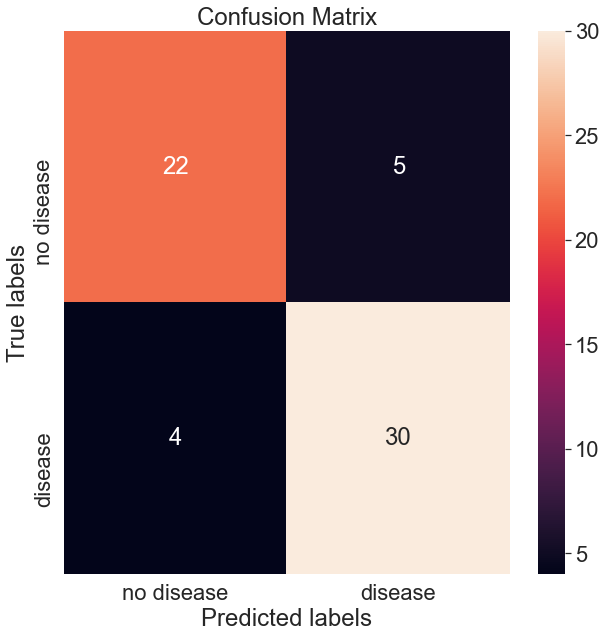

In [1195]:
print(classification_report(y_test_ann, y_pred)) # output accuracy
print_evaluations(y_test_ann, y_pred, 'ANN')
   
ANN_cm =    confusion_matrix(y_test_ann, y_pred)
#ANN_score =  round(model(X_test_ann, y_test_ann)*100)
ANN_score = 88

In [ ]:
hist.history

In [ ]:
pd.DataFrame(hist.history).plot()
plt.xlabel('Epoch', fontsize=30)
plt.ylabel('scores', fontsize=30)

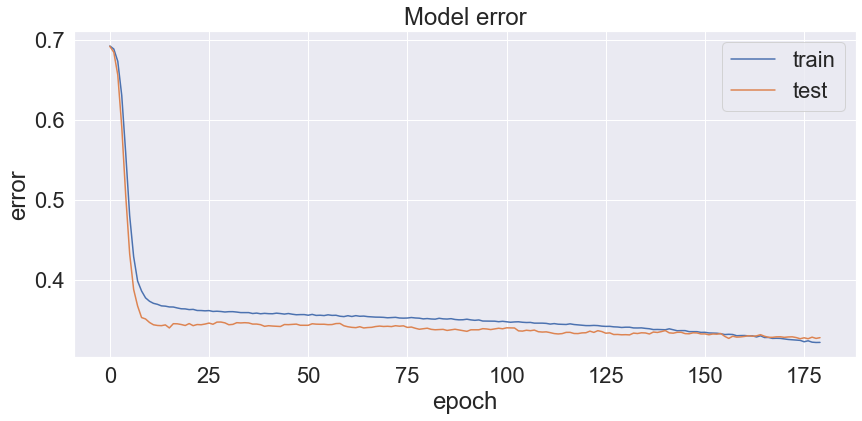

In [1023]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

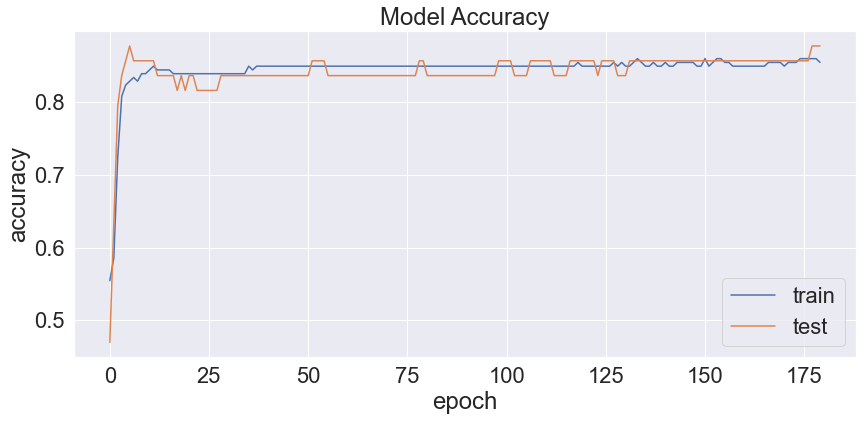

In [1024]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
 network.summary()

# Save a list of np.arrays with the weights

In [ ]:
w = network.get_weights()

In [ ]:
#w

In [ ]:
# extract the names of the TF variables
[v.name for v in network.weights]

In [ ]:
w[0].shape

In [ ]:
# Examine the patterns of the weights 

In [ ]:
#for i in range(8):
##    plt.imshow(w[0][:,i].reshape((13, 1)))
 #   plt.show()

# Drawing a Keras model

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Regularization:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
X = df.iloc[:,:-1] #all rows (:), and all columns EXCEPT for the last one
y = df['output']

In [ ]:
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print (len(X_test), len(y_test))


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)


In [ ]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)


In [ ]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)


In [ ]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [ ]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=30)
plt.ylabel('Coefficient Magnitude',fontsize=30)
plt.legend(fontsize=15,loc=4)
plt.show()

In [ ]:
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
print ( '')
print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
print ( '')
print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
print('')
print ("LReg training score:", lr_train_score )
print ("LReg test score: ", lr_test_score )




# Comapring models

In [1213]:
models = pd.DataFrame({ 'model':['LReg', 'D_Tree', 'R.For', 
                                 'NB', 'SVN', 'KNN','ANN'], 
                        'score':[logReg_score, decisson_Tree_score, random_forest_score, 
                                 Naives_Bayes_score, SupportVectorMachine_score, K_NEAREST_NEIGHBORS_score, ANN_score]})

mod_scor= models.sort_values('score', ascending=False)

In [1214]:
mod_scor

,model,score
0,LReg,87
4,SVN,87
6,ANN,87
3,NB,85
5,KNN,82
1,D_Tree,76
2,R.For,76


<AxesSubplot:title={'center':'Scores for each model classifier (for the heart dissease)'}, xlabel='model', ylabel='score'>

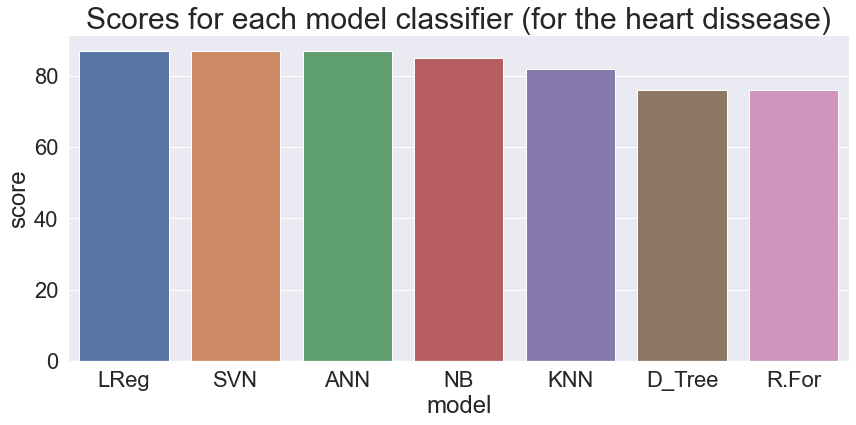

In [1216]:
plt.title('Scores for each model classifier (for the heart dissease)', fontsize=30)
sns.barplot(x='model', y ='score', data =mod_scor)

In [1231]:
model_recall = pd.DataFrame({ 'model':['LReg', 'D_Tree', 'R.For', 
                                 'NB', 'SVN', 'KNN','ANN'], 
                        'recall':[86, 99, 88, 
                                 91, 94, 85, 85]})
m_recall =model_recall.sort_values('recall', ascending=False)
m_recall

,model,recall
1,D_Tree,99
4,SVN,94
3,NB,91
2,R.For,88
0,LReg,86
5,KNN,85
6,ANN,85


<AxesSubplot:title={'center':'Recalls for each model classifier (for the heart dissease)'}, xlabel='model', ylabel='recall'>

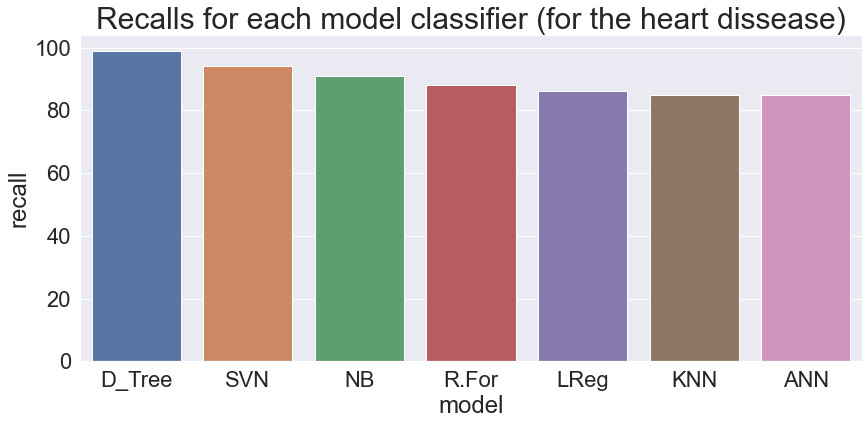

In [1232]:
#plt.ylabel('recal (%)', fontsize=30)
#plt.xlabel('models', fontsize=30)
plt.title('Recalls for each model classifier (for the heart dissease)', fontsize=30)
sns.barplot(x='model', y ='recall', data =m_recall)

In [1333]:
model_all = pd.DataFrame({ 'model':['LReg', 'D_Tree', 'R.For', 'NB', 'SVN', 'KNN','ANN'], 
                        'recall':[86,       99,       88,      91,   94,   85,    85],
                      'precison':[91,       93,       86,      84,   84,   83,    88],
                      'accuracy':[87,       95,       86,      85,   87,   82,    85],
                     'cross-val':[82,       77,       83,      81,   64,   64,    88],
                         'score':[87,       76,       76,      85,   87,   82,    87],   
                         })
 
model_all.columns

Index(['model', 'recall', 'precison', 'accuracy', 'cross-val', 'score'], dtype='object')

In [1334]:
m2 = model_all.sort_values(['precison'],  ascending = (False))

In [1335]:
m2

,model,recall,precison,accuracy,cross-val,score
1,D_Tree,99,93,95,77,76
0,LReg,86,91,87,82,87
6,ANN,85,88,85,88,87
2,R.For,88,86,86,83,76
3,NB,91,84,85,81,85
4,SVN,94,84,87,64,87
5,KNN,85,83,82,64,82


Text(0.5, 1.0, 'Precison for each model classifier (for the heart dissease)')

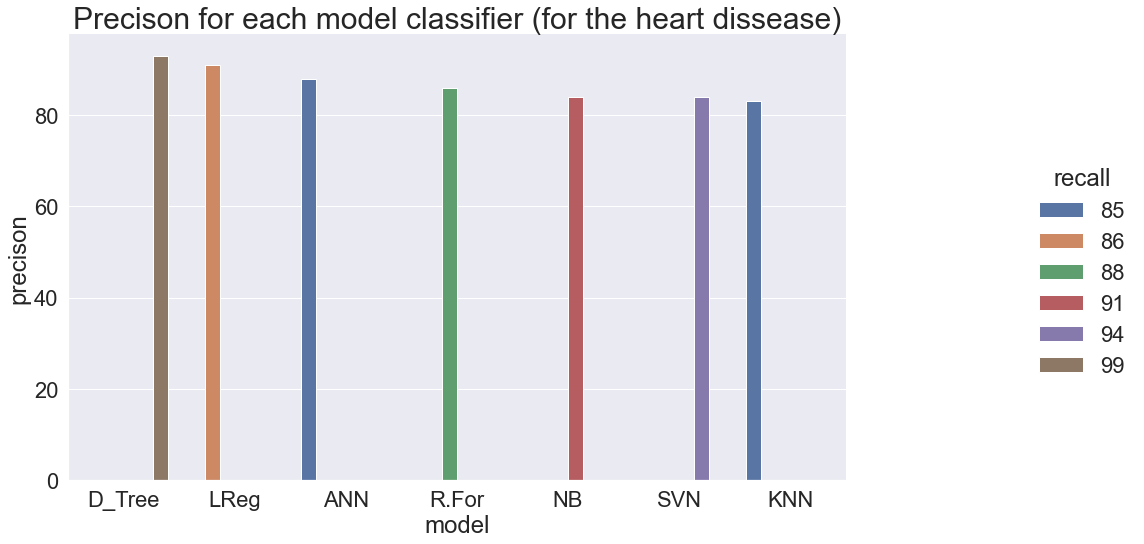

In [1336]:
g = sns.catplot(x = 'model', y='precison',  hue = 'recall',data=m2,  kind='bar', )
g.fig.set_figwidth(18)
g.fig.set_figheight(8)
plt.title('Precison for each model classifier (for the heart dissease)', fontsize=30)



In [1323]:
m3 = model_all.sort_values(['score'],  ascending = (False))

m3

,model,recall,precison,accuracy,cross-val,score
0,LReg,86,91,87,82,87
4,SVN,94,84,87,64,87
6,ANN,85,88,85,88,87
3,NB,91,84,85,81,85
5,KNN,85,83,82,64,82
1,D_Tree,99,93,95,77,76
2,R.For,88,86,86,83,76


Text(0.5, 1.0, 'Score for each model classifier (for the heart dissease)')

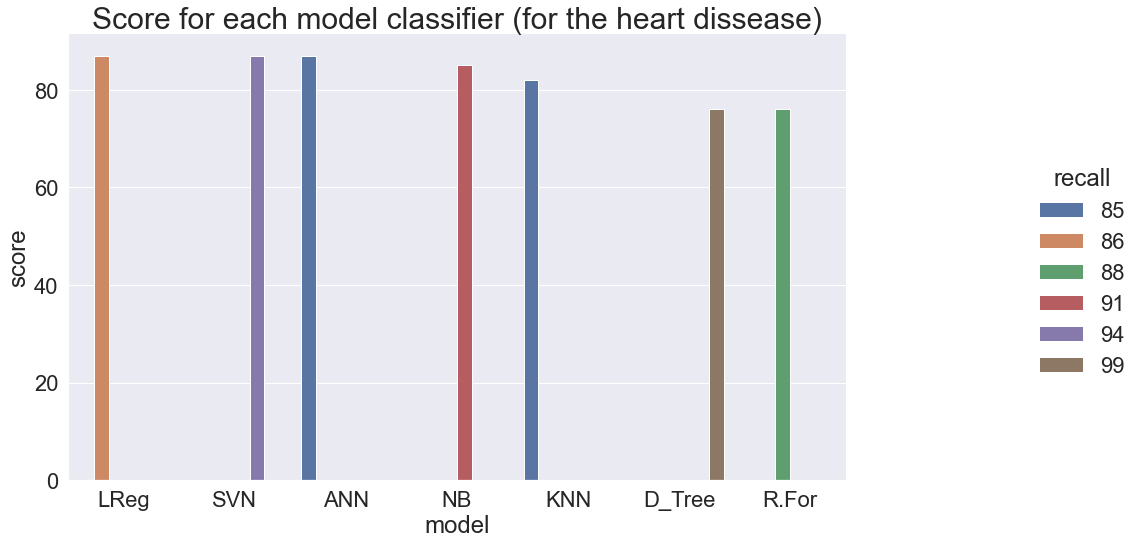

In [1331]:
g = sns.catplot(x = 'model', y='score',  hue = 'recall',data=m3,  kind='bar', )

g.fig.set_figwidth(18)
g.fig.set_figheight(8)
plt.title('Score for each model classifier (for the heart dissease)', fontsize=30)



In [1327]:
m4 = model_all.sort_values(['accuracy'],  ascending = (False))

m4

,model,recall,precison,accuracy,cross-val,score
1,D_Tree,99,93,95,77,76
0,LReg,86,91,87,82,87
4,SVN,94,84,87,64,87
2,R.For,88,86,86,83,76
3,NB,91,84,85,81,85
6,ANN,85,88,85,88,87
5,KNN,85,83,82,64,82


Text(0.5, 1.0, 'Accuracy for each model classifier (for the heart dissease)')

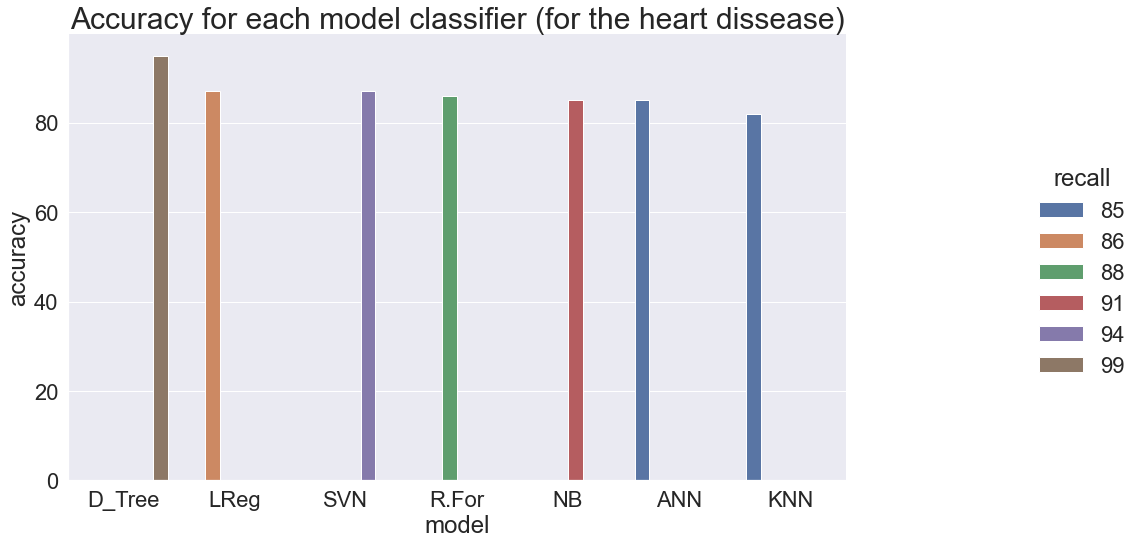

In [1332]:
g = sns.catplot(x = 'model', y='accuracy',  hue = 'recall',data=m4,  kind='bar', )

g.fig.set_figwidth(18)
g.fig.set_figheight(8)

plt.title('Accuracy for each model classifier (for the heart dissease)', fontsize=30)



In [1338]:
m5 = model_all.sort_values(['cross-val'],  ascending = (False))

m5

,model,recall,precison,accuracy,cross-val,score
6,ANN,85,88,85,88,87
2,R.For,88,86,86,83,76
0,LReg,86,91,87,82,87
3,NB,91,84,85,81,85
1,D_Tree,99,93,95,77,76
4,SVN,94,84,87,64,87
5,KNN,85,83,82,64,82


Text(0.5, 1.0, 'Cross-validation for each model classifier (for the heart dissease)')

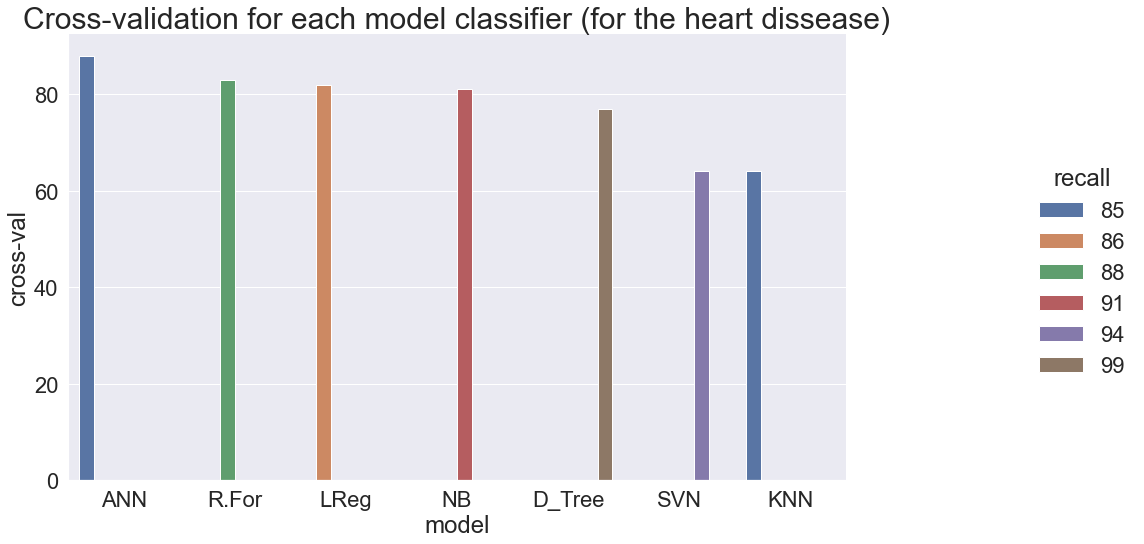

In [1339]:
g = sns.catplot(x = 'model', y='cross-val',  hue = 'recall',data=m5,  kind='bar', )

g.fig.set_figwidth(18)
g.fig.set_figheight(8)

plt.title('Cross-validation for each model classifier (for the heart dissease)', fontsize=30)
